# Problem Statement - Covid 19 dataset from john Hopkins
## The dataset contains - 5 columns and 267 rows including header.¶
## Dataset has a date and confirmed columns which are used for liner regression model and K means clusterning

In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
sns.set(font_scale=1.4)
plt.style.use('seaborn')
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as tick
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data 
covid_data = pd.read_csv("covid19.csv")
covid_data.head()
covid_data_raw=covid_data
covid=covid_data

In [3]:
# Removing not essential columns for data preparation.
coviddrop = covid.drop(['Lat','Long'],axis = 1)
coviddrop
covidMelt = coviddrop.melt(id_vars = ['Country/Region'])
coviddropNan = covidMelt.dropna()
coviddropvariable = coviddropNan[coviddropNan['variable'] != 'Province/State']
covidtopCountries = coviddropvariable.groupby(['Country/Region'])['value'].sum().reset_index().sort_values(by = 'value',ascending = False)
covidtopCountries[0:3] 

,Country/Region,value
174,US,256188640
23,Brazil,108024882
79,India,52737993


In [4]:
# Here top three countries of confirmed cases are US, Brazil and India. 
# US has 25Million cases 
# Brazil has 10 Million cases 
# India has 5 Million cases 

In [5]:
#Selecting top countries for more analysis of EDA

Covidtop3countries = coviddropvariable.loc[coviddropvariable['Country/Region'].isin(['US','Brazil','India'])]
set(Covidtop3countries['Country/Region'])

#Renaming columns  and grouping data 

pd.set_option('mode.chained_assignment',None)
Covidtop3countries.columns = ['Country','Date','No of Cases']
Covidtop3countries['Date'] = pd.to_datetime(Covidtop3countries.Date)
Covidtop3countriesGroup = Covidtop3countries.groupby(['Country',pd.Grouper(key = 'Date', freq = 'SM')])['No of Cases'].sum().reset_index().sort_values('Date')
Covidtop3countriesGroup
Covidtop3countriesGroup1 = Covidtop3countriesGroup[Covidtop3countriesGroup['Date'] < '2020-06-30']
Covidtop3countriesGroup1
Covidtop3countriesGroup1['Parsed Date'] = Covidtop3countriesGroup1['Date'].astype(str)
Covidtop3countriesGroup1['Parsed Date'] =  Covidtop3countriesGroup1['Parsed Date'].str[6:]
Covidtop3countriesGroup1['Parsed Date'] = Covidtop3countriesGroup1['Parsed Date'].replace({'-':'/'}, regex=True)
Covidtop3countriesGroup1[0:10]

,Country,Date,No of Cases,Parsed Date
0,Brazil,2020-01-15,0,1/15
14,India,2020-01-15,1,1/15
28,US,2020-01-15,31,1/15
1,Brazil,2020-01-31,0,1/31
15,India,2020-01-31,40,1/31
29,US,2020-01-31,161,1/31
2,Brazil,2020-02-15,3,2/15
16,India,2020-02-15,42,2/15
30,US,2020-02-15,200,2/15
31,US,2020-02-29,10395,2/29


In [6]:
#Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
def reformat_large_tick_values(tick_val, pos):

    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}Billion'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}Million'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

<function matplotlib.pyplot.show(close=None, block=None)>

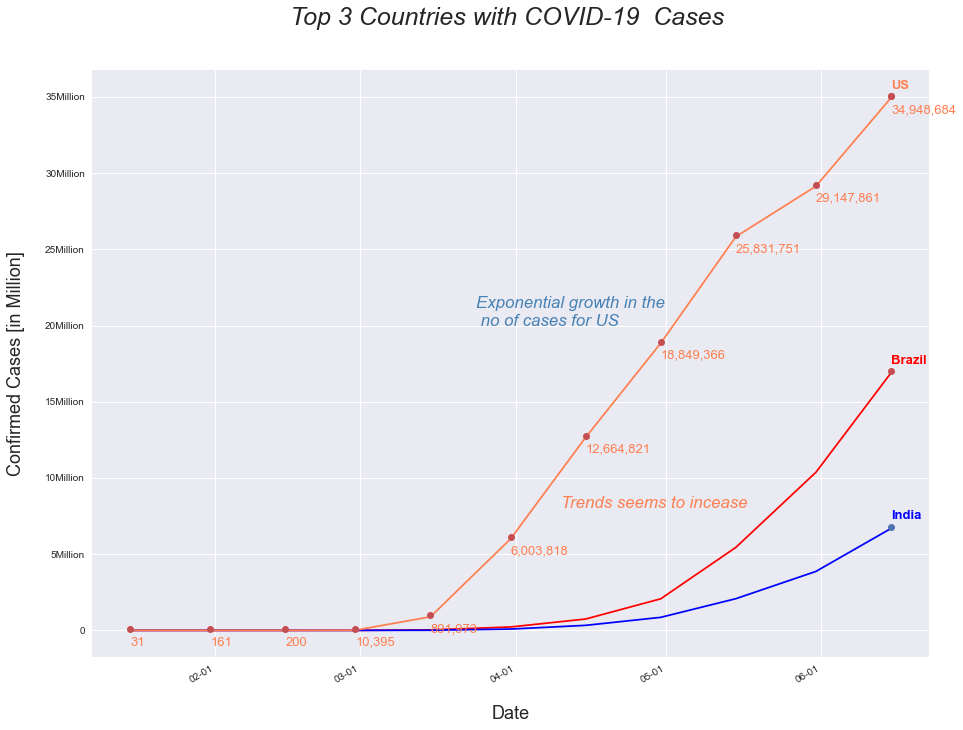

In [7]:
# Definning dictionary
color = {'US':'coral','Brazil':'red','India':'blue'}
color

# Creating subplots
fig,ax = plt.subplots(figsize = (15,12))

for label,df in Covidtop3countriesGroup1.groupby(['Country']):
        df.plot(kind = 'line',x = 'Date', y = 'No of Cases',ax =ax,label = label, color = color[label])

# Formating Y axis
plt.ticklabel_format(style = 'plain',axis = 'y')


# Define colors
color_annotation = {'US':'ro','Brazil':'ro','India':'bo'}
color_annotation

# Picking maximum point to annotate the coordinates
CovidFinalMax = Covidtop3countriesGroup1.groupby(['Country'])['Date'].transform(max) == Covidtop3countriesGroup1['Date']
CovidFinal = Covidtop3countriesGroup1[CovidFinalMax]
CovidFinal

# adding same line color and text color
for Country,date,Cases,parseddate in zip(CovidFinal['Country'],CovidFinal['Date'],CovidFinal['No of Cases'],CovidFinal['Parsed Date']):
        xmax = pd.to_datetime(date)
        ymax = Cases
        ax.plot(xmax,ymax+100000,color_annotation[Country])
        ax.text(xmax,ymax+600000,Country,color = color[Country],fontsize = 13,fontweight='bold')
 

# Selecting one countries and adding information in the chart
CovidUS = Covidtop3countriesGroup1[Covidtop3countriesGroup1['Country'] == 'US']
for Country,date,Cases,parseddate,case1 in zip(CovidUS['Country'],CovidUS['Date'],CovidUS['No of Cases'],CovidUS['Parsed Date'],CovidUS['No of Cases'].apply(lambda x : "{:,}".format(x))):
        xmax = pd.to_datetime(date)
        ymax = Cases
        ax.plot(xmax,ymax+100000,color_annotation[Country])
        ax.text(xmax,ymax-800000,case1,color = color[Country],fontsize = 13,va = 'center')

# Position of text field
xcord = pd.to_datetime('2020-03-24')
ax.annotate("Exponential growth in the\n no of cases for US", xy=(xcord, 20000000),
            xytext=(xcord, 20000000),color='steelblue',style='italic')

# Position of text field
xcord = pd.to_datetime('2020-04-10')
ax.annotate("Trends seems to incease", xy=(xcord, 8000000),
            xytext=(xcord, 8000000),color='coral',style='italic')

# Removing legend from left side
ax.get_legend().remove()

# Formating date in x axis
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

# setting grid as true
ax.grid(True)


# Adding title
plt.title('Top 3 Countries with COVID-19  Cases \n',y=1.02, fontsize =25,style='italic')
plt.ylabel('Confirmed Cases [in Million]', labelpad =20, fontsize =18)
plt.xlabel('Date', labelpad =20, fontsize =18)
plt.show

In [8]:
# The spike on cases arises within a week in this reason and we can assume the level of spreding of COVID -19
# Few insights can be made
#1. Spread in US is much higher within a week and preventive measurment wasnt taken at right time.
#2. China remains close by doesnt have great impact on India and neighboring country. 

In [9]:
#---------------
# RENAME COLUMNS
#---------------
covid_data = covid_data.rename(
        columns = {'Province/State':'subregion'
                   ,'Country/Region':'country'
                   ,'Lat':'lat'
                   ,'Long':'long'
                   }
        )

In [10]:
#==================================
# RESHAPE THE DATA
# - melt the data into 'tidy' shape
#==================================
covid_data = (covid_data.melt(id_vars = ['country','subregion','lat','long']
                 ,var_name = 'date_RAW'
                 ,value_name = 'confirmed'
                 )
)

In [11]:
#--------------
# CONVERT DATES
#--------------

# INSPECT DATES
(covid_data
    .filter(['date_RAW'])
)

,date_RAW
0,1/22/20
1,1/22/20
2,1/22/20
3,1/22/20
4,1/22/20
...,...
51865,08/03/20
51866,08/03/20
51867,08/03/20
51868,08/03/20


In [12]:
#-------------
# CONVERT DATE
#-------------
covid_data = covid_data.assign(
         date = pd.to_datetime(covid_data.date_RAW, format='%m/%d/%y')
         )

In [13]:
#=====================
# SORT & REARANGE DATA
#=====================
covid_data = (covid_data
               .filter(['country', 'subregion', 'date', 'lat', 'long', 'confirmed'])
               .sort_values(['country','subregion','lat','long','date'])
               )
covid_data.head()

,country,subregion,date,lat,long,confirmed
0,Afghanistan,NaN,2020-01-22,33.93911,67.709953,0
266,Afghanistan,NaN,2020-01-23,33.93911,67.709953,0
532,Afghanistan,NaN,2020-01-24,33.93911,67.709953,0
798,Afghanistan,NaN,2020-01-25,33.93911,67.709953,0
1064,Afghanistan,NaN,2020-01-26,33.93911,67.709953,0


In [14]:
# SET INDEX
covid_data.set_index('country', inplace = True)

In [15]:
# GET COUNTRY NAMES
pd.set_option('display.max_rows', 155)
(covid_data
    .reset_index()
    .filter(['country'])
    .drop_duplicates()
    .head(n = 200)
)

,country
0,Afghanistan
195,Albania
390,Algeria
585,Andorra
780,Angola
...,...
50895,West Bank and Gaza
51090,Western Sahara
51285,Yemen
51480,Zambia


In [16]:
# Add week number in our dataset

year_start = '2020-01-22'
year_end = '2020-03-08'

# Add the week number

covid_data['Week Number'] = (((covid_data.date.view(np.int64) - pd.to_datetime([year_start]).view(np.int64)) / 
                      (1e9 * 60 * 60 * 24) - covid_data.date.dt.day_of_week + 7) // 7 + 1).astype(np.int64)
covid_data.head()

,subregion,date,lat,long,confirmed,Week Number
country,,,,,,
Afghanistan,NaN,2020-01-22,33.93911,67.709953,0,1
Afghanistan,NaN,2020-01-23,33.93911,67.709953,0,1
Afghanistan,NaN,2020-01-24,33.93911,67.709953,0,1
Afghanistan,NaN,2020-01-25,33.93911,67.709953,0,1
Afghanistan,NaN,2020-01-26,33.93911,67.709953,0,1


In [17]:
#Top Three Countries 

covidtopCountries = covid_data.groupby(['country']).sum().sort_values(by = 'confirmed',ascending = False)
topcountry=covidtopCountries[0:3] 
topcountry.reset_index()

,country,lat,long,confirmed,Week Number
0,US,7800.00000,-19500.0000,256188640,2869
1,Brazil,-2775.82500,-10125.4335,108024882,2869
2,India,4015.76838,15397.7616,52737993,2869


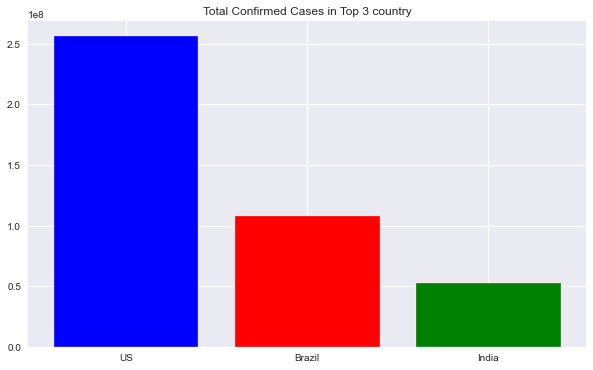

In [18]:
# Graphic illustrates Total cases in the world.
topcountry = topcountry.head(3)
x = topcountry.index
y = topcountry['confirmed'].values

plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(x, y, color=['blue', 'red', 'green'])
plt.title('Total Confirmed Cases in Top 3 country')
plt.show()

In [19]:
# Now we know top three countries to get the dataset and do the analysis. 
# US dataset preparation 
country = "US"
us_cov19= covid_data_raw[covid_data_raw["Country/Region"].values == country]
us_cov19.head()
us_cov19 = us_cov19.drop(columns ='Province/State')
us_cov19 = us_cov19.drop(columns ='Country/Region')
us_cov19 = us_cov19.drop(columns ='Lat')
us_cov19 = us_cov19.drop(columns ='Long')

In [20]:
us_cov19=pd.melt(us_cov19,var_name='date',value_name='total')
us_cov19['date'] = pd.to_datetime(us_cov19['date'])

In [22]:

# Add week number in our dataset

year_start = '2020-01-22'
year_end = '2020-08-03'

# Add the week number

us_cov19['Week Number'] = (((us_cov19.date.view(np.int64) - pd.to_datetime([year_start]).view(np.int64)) / 
                      (1e9 * 60 * 60 * 24) - us_cov19.date.dt.day_of_week + 7) // 7 + 1).astype(np.int64)
us_cov19

,date,total,Week Number
0,2020-01-22,1,1
1,2020-01-23,1,1
2,2020-01-24,2,1
3,2020-01-25,2,1
4,2020-01-26,5,1
...,...,...,...
190,2020-07-30,4495015,28
191,2020-07-31,4562107,28
192,2020-08-01,4620592,28
193,2020-08-02,4668172,28


In [23]:
us_cov19['date'] = pd.to_datetime(us_cov19['date'])
grouped_df = us_cov19.groupby(["total", "Week Number"]).sum().reset_index()[["total", "Week Number"]]

In [25]:
# Create the X and y variables
X = grouped_df.index.values.reshape(-1, 1)
y = grouped_df["total"].values


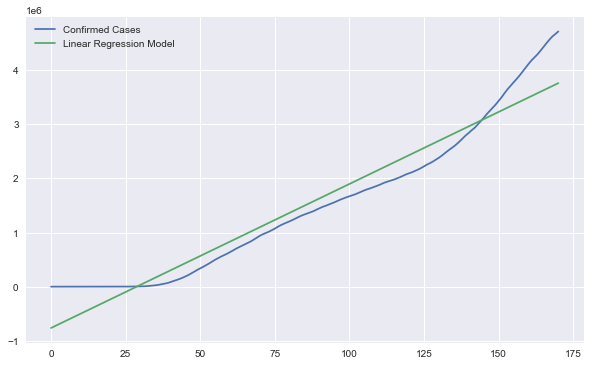

In [26]:
# Create the linear regression model
model = LinearRegression().fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the results
plt.plot(X, y, label='Confirmed Cases')
plt.plot(X, y_pred, label='Linear Regression Model')
plt.legend()
plt.show()

In [27]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)
print('R-squared:', model.score(X, y))

# R sqaure shows 93% accuracy in our model and our prediction is as per anticipated analysis. 

Intercept: -763053.5451516388
Coefficient: [26602.72020784]
R-squared: 0.934941361899514


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define cross-validation method
cv = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate model using k-fold cross-validation
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

# report performance
print('Mean MSE: %.3f' % np.mean(scores))
print('Variance of MSE: %.3f' % np.var(scores, ddof=1))

Mean MSE: -123745431737.754
Variance of MSE: 2436916168383514279936.000


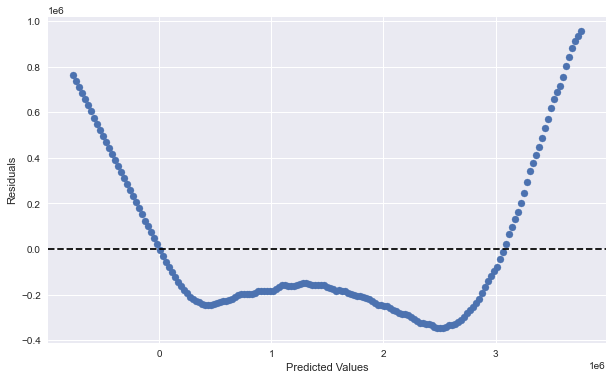

In [29]:
#The variance of the MSE indicates how much the performance of the model 
#varies across different cross-validation folds. A large variance of the MSE 
#suggests that the model is sensitive to the choice of training and testing subsets 
#and may not generalize well to new data. A variance of 2436916168383514279936 is an extremely large number, 
#so it suggests that the model is overfitting the training data and is not able to generalize well to new data.

residuals = y - model.predict(X)
plt.scatter(model.predict(X), residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()


In [30]:
# Now we know top three countries to get the dataset and do the analysis. 

country = "Brazil"
b_cov19= covid_data_raw[covid_data_raw["Country/Region"].values == country]
b_cov19.head()
b_cov19 = b_cov19.drop(columns ='Province/State')
b_cov19 = b_cov19.drop(columns ='Country/Region')
b_cov19 = b_cov19.drop(columns ='Lat')
b_cov19 = b_cov19.drop(columns ='Long')

In [31]:
b_cov19=pd.melt(b_cov19,var_name='date',value_name='total')
b_cov19['date'] = pd.to_datetime(b_cov19['date'])


In [32]:
# Add week number in our dataset

year_start = '2020-01-22'
year_end = '2020-08-03'

# Add the week number

b_cov19['Week Number'] = (((b_cov19.date.view(np.int64) - pd.to_datetime([year_start]).view(np.int64)) / 
                      (1e9 * 60 * 60 * 24) - b_cov19.date.dt.day_of_week + 7) // 7 + 1).astype(np.int64)


In [33]:
b_cov19['date'] = pd.to_datetime(b_cov19['date'])
grouped_df1 = b_cov19.groupby(["total", "Week Number"]).sum().reset_index()[["total", "Week Number"]]

In [34]:
# Create the X and y variables
X1 = grouped_df1.index.values.reshape(-1, 1)
y1 = grouped_df1["total"].values


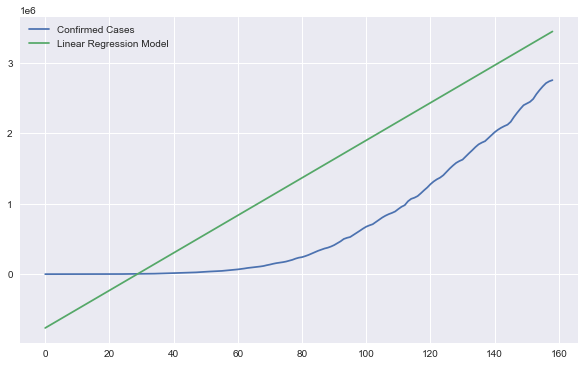

In [35]:
# Create the linear regression model
model1 = LinearRegression().fit(X1, y1)

# Make predictions
y_pred1 = model.predict(X1)

# Visualize the results
plt.plot(X1, y1, label='Confirmed Cases')
plt.plot(X1, y_pred1, label='Linear Regression Model')
plt.legend()
plt.show()

In [36]:
print('Intercept:', model1.intercept_)
print('Coefficient:', model1.coef_)
print('R-squared:', model1.score(X1, y1))


Intercept: -615129.0356132082
Coefficient: [16386.45208682]
R-squared: 0.8149649705667862


In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define cross-validation method
cv1 = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate model using k-fold cross-validation
scores = cross_val_score(model1, X1, y1, scoring='neg_mean_squared_error', cv=cv1)

# report performance
print('Mean MSE: %.3f' % np.mean(scores))
print('Variance of MSE: %.3f' % np.var(scores, ddof=1))

Mean MSE: -131666440866.198
Variance of MSE: 526626867471238627328.000


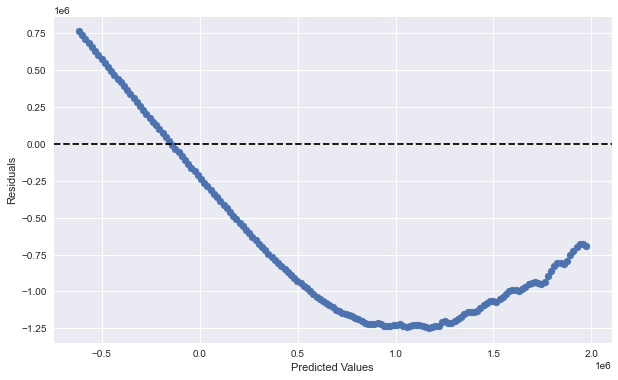

In [38]:
residuals1 = y1 - model.predict(X1)
plt.scatter(model1.predict(X1), residuals1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [39]:
country = "India"
I_cov19= covid_data_raw[covid_data_raw["Country/Region"].values == country]
I_cov19.head()
I_cov19 = I_cov19.drop(columns ='Province/State')
I_cov19 = I_cov19.drop(columns ='Country/Region')
I_cov19 = I_cov19.drop(columns ='Lat')
I_cov19 = I_cov19.drop(columns ='Long')

In [40]:
I_cov19=pd.melt(I_cov19,var_name='date',value_name='total')
I_cov19['date'] = pd.to_datetime(I_cov19['date'])


In [41]:
# Add week number in our dataset

year_start = '2020-01-22'
year_end = '2020-08-03'

# Add the week number

I_cov19['Week Number'] = (((I_cov19.date.view(np.int64) - pd.to_datetime([year_start]).view(np.int64)) / 
                      (1e9 * 60 * 60 * 24) - I_cov19.date.dt.day_of_week + 7) // 7 + 1).astype(np.int64)

In [42]:
I_cov19['date'] = pd.to_datetime(I_cov19['date'])
grouped_df2 = I_cov19.groupby(["total", "Week Number"]).sum().reset_index()[["total", "Week Number"]]

In [43]:
# Create the X and y variables
X2 = grouped_df2.index.values.reshape(-1, 1)
y2 = grouped_df2["total"].values


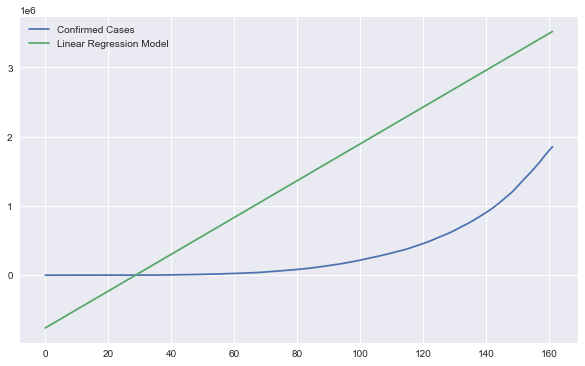

In [44]:
# Create the linear regression model
model2 = LinearRegression().fit(X2, y2)

# Make predictions
y_pred2 = model.predict(X2)

# Visualize the results
plt.plot(X2, y2, label='Confirmed Cases')
plt.plot(X2, y_pred2, label='Linear Regression Model')
plt.legend()
plt.show()

In [45]:
print('Intercept:', model2.intercept_)
print('Coefficient:', model2.coef_)
print('R-squared:', model2.score(X2, y2))


Intercept: -346303.56865863834
Coefficient: [8345.91612014]
R-squared: 0.6975043945543162


In [46]:
# define cross-validation method
cv2 = KFold(n_splits=10, shuffle=True, random_state=1)

# evaluate model using k-fold cross-validation
scores = cross_val_score(model2, X2, y2, scoring='neg_mean_squared_error', cv=cv2)

# report performance
print('Mean MSE: %.3f' % np.mean(scores))
print('Variance of MSE: %.3f' % np.var(scores, ddof=1))

Mean MSE: -66419273614.067
Variance of MSE: 429634886042120552448.000


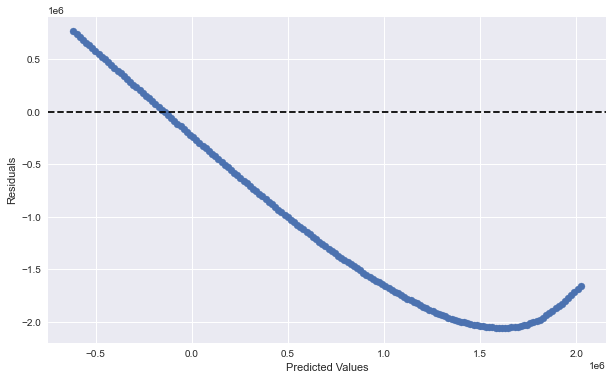

In [47]:
residuals1 = y2 - model.predict(X2)
plt.scatter(model1.predict(X2), residuals1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(np.array(X2).reshape(-1, 1))
# Convert the datetime object to a Unix timestamp in seconds
I_cov19['date'] = I_cov19['date'].astype(np.int64) // 10**9

In [49]:
# Determine the optimal number of clusters using the elbow method
df_India = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    df_India.append(kmeans.inertia_)

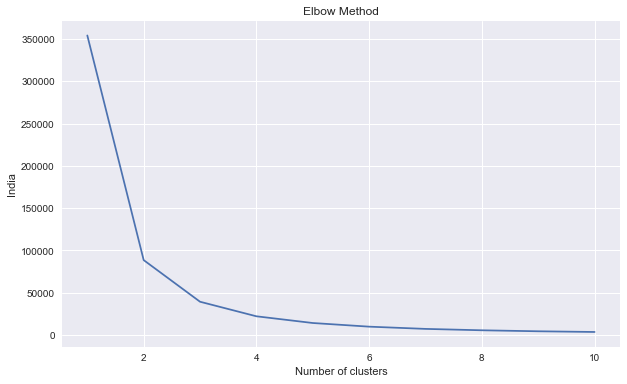

In [50]:
# Plot the elbow graph to identify the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), df_India)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('India')
plt.show()


In [51]:
# Apply k-means clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y2 = kmeans.fit_predict(X2)
I_cov19

,date,total,Week Number
0,1579651200,0,1
1,1579737600,0,1
2,1579824000,0,1
3,1579910400,0,1
4,1579996800,0,1
...,...,...,...
190,1596067200,1634746,28
191,1596153600,1695988,28
192,1596240000,1750723,28
193,1596326400,1803695,28


In [52]:
# Convert the DataFrame to a numpy array
I_cov19 = I_cov19.values

In [53]:
# Choose the number of clusters (k)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(I_cov19)

KMeans(n_clusters=3)

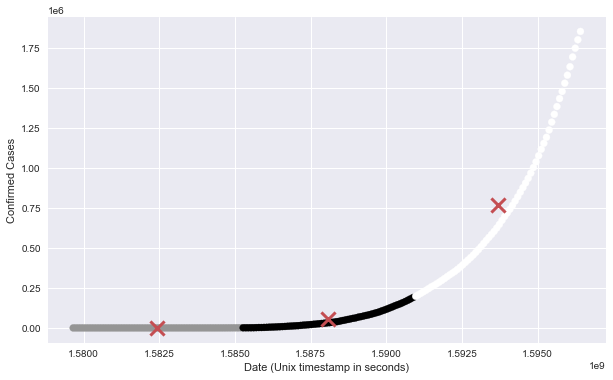

In [54]:
#Get the cluster labels for each data point
labels = kmeans.labels_

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_


# Plot the data points and centroids
plt.scatter(I_cov19[:, 0], I_cov19[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Date (Unix timestamp in seconds)')
plt.ylabel('Confirmed Cases')
plt.show()